In [3]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sns
plt.style.use('ggplot')
pd.set_option("display.max_rows", None)

In [5]:
#READING THE FILE
df = pd.read_csv("Mobiles Dataset (2025).csv",encoding='windows-1254')

In [7]:
df.shape

(930, 15)

In [9]:
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [11]:
df.dtypes #GETTING ALL THE DATATYPES OF THE VALUES IN EVERY COLUMN

Company Name                 object
Model Name                   object
Mobile Weight                object
RAM                          object
Front Camera                 object
Back Camera                  object
Processor                    object
Battery Capacity             object
Screen Size                  object
Launched Price (Pakistan)    object
Launched Price (India)       object
Launched Price (China)       object
Launched Price (USA)         object
Launched Price (Dubai)       object
Launched Year                 int64
dtype: object

In [13]:
df.columns #GETTING THE COLUMN NAMES

Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (India)',
       'Launched Price (China)', 'Launched Price (USA)',
       'Launched Price (Dubai)', 'Launched Year'],
      dtype='object')

In [15]:
#REMOVING THE COLUMNS WE DONT NEED AND UPDATING THE DATASET
df= df[['Company Name', 'Model Name','Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera','Processor', 'Battery Capacity', 'Screen Size','Launched Price (India)','Launched Year']].copy()

In [17]:
#UPDATING  THE DATATYPE OF A COLUMN
df['Launched Price (India)'] = df['Launched Price (India)'].astype('str')

In [19]:
df.dtypes

Company Name              object
Model Name                object
Mobile Weight             object
RAM                       object
Front Camera              object
Back Camera               object
Processor                 object
Battery Capacity          object
Screen Size               object
Launched Price (India)    object
Launched Year              int64
dtype: object

In [21]:
#REMOVING INR FROM Launched Price (India)
df['Launched Price (India)'] = df['Launched Price (India)'].str.split(' ').str.get(1)

In [23]:
#RENAMING THE COLUMN
df = df.rename(columns={'Launched Price (India)':'Launched Price'})

In [25]:
#CHECKING IF THERE'S ANY NULL VALUE
df.isna().sum()

Company Name        0
Model Name          0
Mobile Weight       0
RAM                 0
Front Camera        0
Back Camera         0
Processor           0
Battery Capacity    0
Screen Size         0
Launched Price      0
Launched Year       0
dtype: int64

In [27]:
df['Launched Price'] = df['Launched Price'].str.replace(',', '', regex=False)

In [29]:
df['Launched Price'] = pd.to_numeric(df['Launched Price'])

In [31]:
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price,Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,79999,2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,84999,2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,89999,2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,89999,2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,94999,2024


In [33]:
unique_values = df['Company Name'].unique()
print(unique_values)

['Apple' 'Samsung' 'OnePlus' 'Vivo' 'iQOO' 'Oppo' 'Realme' 'Xiaomi'
 'Lenovo' 'Motorola' 'Huawei' 'Nokia' 'Sony' 'Google' 'Tecno' 'Infinix'
 'Honor' 'POCO' 'Poco']


In [35]:
df.replace(to_replace='POCO', value='Poco', inplace=True)

In [37]:
df['Company Name'].value_counts()

Company Name
Oppo        129
Apple        97
Honor        91
Samsung      88
Vivo         86
Realme       69
Motorola     62
Infinix      56
OnePlus      53
Huawei       42
Tecno        39
Poco         32
Xiaomi       27
Google       21
Lenovo       15
Nokia        11
Sony          9
iQOO          3
Name: count, dtype: int64

Text(0, 0.5, 'Count')

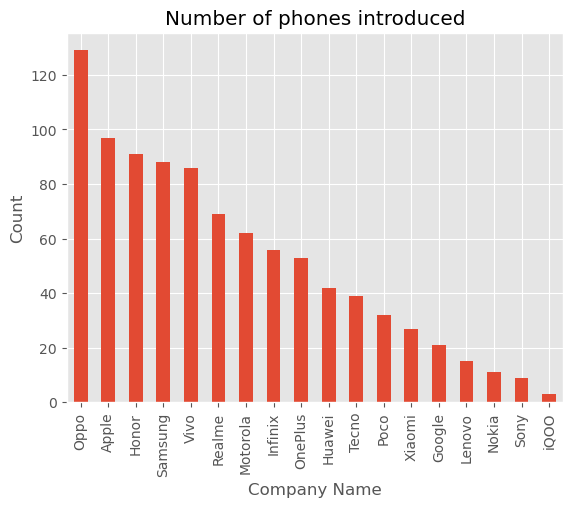

In [39]:
ax = df['Company Name'].value_counts() \
    .plot(kind='bar', title='Number of phones introduced')
ax.set_xlabel('Company Name')
ax.set_ylabel('Count')

In [41]:
average_price = df.groupby('Company Name')['Launched Price'].mean().round(0)
print(average_price)

Company Name
Apple       102999.0
Google       70332.0
Honor        48851.0
Huawei      102799.0
Infinix      17320.0
Lenovo       25392.0
Motorola     33693.0
Nokia        13772.0
OnePlus      45735.0
Oppo         43758.0
Poco         22796.0
Realme       26148.0
Samsung      63606.0
Sony         91666.0
Tecno        36807.0
Vivo         35770.0
Xiaomi       57258.0
iQOO         43999.0
Name: Launched Price, dtype: float64


Text(0, 0.5, 'average price')

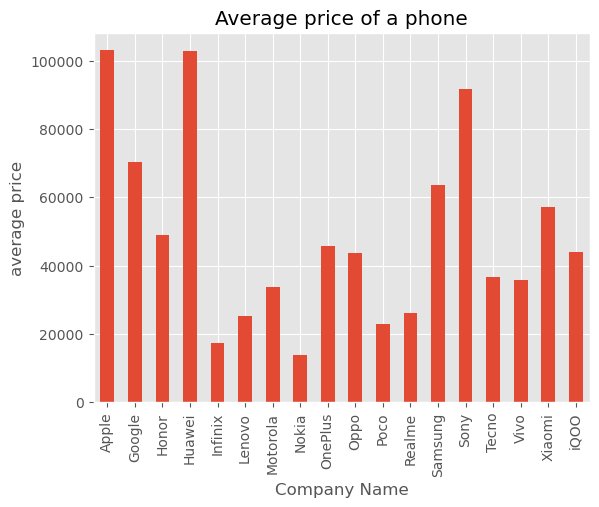

In [43]:
#plotting average price and company name
ax = df.groupby('Company Name')['Launched Price'].mean().round(0) \
    .plot(kind='bar', title='Average price of a phone')
ax.set_xlabel('Company Name')
ax.set_ylabel('average price')

In [45]:
unique_values = df['RAM'].unique()
print(unique_values)

['6GB' '8GB' '4GB' '3GB' '12GB' '2GB' '1.5GB' '16GB' '10GB' '1GB'
 '8GB / 12GB']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '6GB'),
  Text(1, 0, '8GB'),
  Text(2, 0, '4GB'),
  Text(3, 0, '3GB'),
  Text(4, 0, '12GB'),
  Text(5, 0, '2GB'),
  Text(6, 0, '1.5GB'),
  Text(7, 0, '16GB'),
  Text(8, 0, '10GB'),
  Text(9, 0, '1GB'),
  Text(10, 0, '8GB / 12GB')])

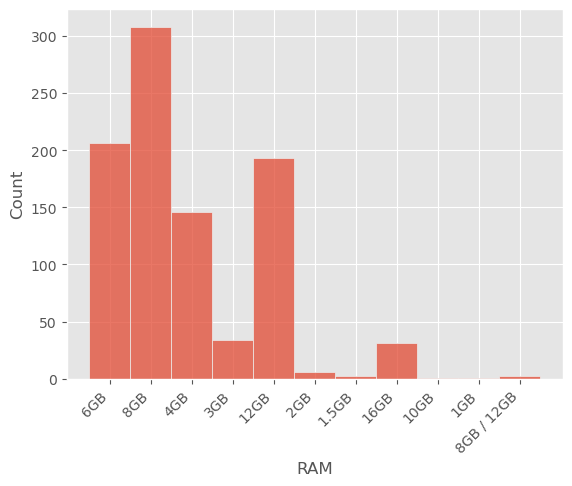

In [47]:
sns.histplot(df , x='RAM')
plt.xticks(rotation = 45, ha = 'right')

In [49]:
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price,Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,79999,2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,84999,2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,89999,2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,89999,2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,94999,2024


In [51]:
#QUESTION WHAT IS THE AVERAGE PRICE OF A COMPANIES PRODUCT IN THE YEARS

In [53]:
grouped = df.groupby(['Company Name','Launched Year'])['Launched Price'].mean()
print(grouped)

Company Name  Launched Year
Apple         2017              94900.000000
              2018             101566.666667
              2019              91263.636364
              2020             106640.740741
              2021             107816.666667
              2022             104999.000000
              2023             102915.666667
              2024             101249.000000
Google        2019              53749.000000
              2020              39999.000000
              2021              60999.000000
              2022              66332.333333
              2023              71665.666667
              2024             108999.000000
Honor         2020              24999.000000
              2021              38449.000000
              2022              51293.117647
              2023              42061.500000
              2024              83054.555556
Huawei        2021              96141.857143
              2022              80713.285714
              2023         